In [1]:
import pandas as pd
from scipy.io import savemat
import os
import os.path as osp
import numpy as np
import glob
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Choice Behavior

In [2]:
os.getcwd()

'/Users/jackiebeltran/Documents/GitHub/RP_Learning/1_scripts/analysis'

In [3]:
flist = glob.glob('../N_80_raw/*.csv')

In [4]:
flist

['../N_80_raw/409_RPlearning_2021_Jun_09_1726.csv',
 '../N_80_raw/441_RPlearning_2022_Dec_13_1206.csv',
 '../N_80_raw/443_RPlearning_2023_Jan_11_1258.csv',
 '../N_80_raw/501_RPlearning_2019_Nov_19_1116.csv',
 '../N_80_raw/416_RPlearning_2021_Sep_03_1401.csv',
 '../N_80_raw/402_RPlearning_2019_Nov_27_1514.csv',
 '../N_80_raw/514_RPlearning_2020_Oct_28_1235.csv',
 '../N_80_raw/408_RPlearning_2021_Mar_01_1434.csv',
 '../N_80_raw/435_RPlearning_2022_Oct_05_1045.csv',
 '../N_80_raw/413_RPlearning_2021_Jun_08_1333.csv',
 '../N_80_raw/504_RPlearning_2019_Dec_04_1615.csv',
 '../N_80_raw/422_RPlearning_2021_Dec_03_1459.csv',
 '../N_80_raw/515_RPlearning_2021_Jan_14_1355.csv',
 '../N_80_raw/430_RPlearning_2022_Jun_29_1001.csv',
 '../N_80_raw/421_RPlearning_2022_Jan_21_1322.csv',
 '../N_80_raw/445_RPlearning_2023_Mar_28_1229.csv',
 '../N_80_raw/550_RPlearning_2023_Sep_07_1158.csv',
 '../N_80_raw/423_RPlearning_2021_Dec_09_1057.csv',
 '../N_80_raw/428_RPlearning_2022_Mar_31_1105.csv',
 '../N_80_ra

In [5]:
len(flist)

80

In [6]:
# concatenate all dfs into one

dfs = []
for f in flist:
    df=pd.read_csv(f)
    dfs.append(df)

df=pd.concat(dfs,ignore_index=True)
df

,corrResp,stim2bottom,stim1position,contingency,stim1top,condition,trials.thisRepN,trials.thisTrialN,trials.thisN,trials.thisIndex,...,choice_onset,outcome_onset,key_resp_2.rt,date,frameRate,expName,session,participant,Unnamed: 24,Unnamed: 23
0,None,3.png,bottom,loss,4.png,loss,0,0,0,19,...,104.249480,104.750169,1.634597,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
1,2,6.png,top,nil,5.png,neutral,0,1,1,22,...,112.255199,112.756182,NaN,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
2,2,4.png,top,nothing,3.png,loss,0,2,2,12,...,120.261369,120.762106,NaN,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
3,2,6.png,top,nil,5.png,neutral,0,3,3,20,...,128.283920,128.784729,NaN,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
4,2,2.png,top,nothing,1.png,gain,0,4,4,8,...,136.289912,136.790557,1.334407,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7195,None,1.png,bottom,win,2.png,gain,2,25,85,1,...,827.035685,827.536388,NaN,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
7196,2,2.png,top,win,1.png,gain,2,26,86,6,...,835.075005,835.575732,0.950779,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
7197,None,5.png,bottom,nil,6.png,neutral,2,27,87,25,...,843.080962,843.581637,NaN,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
7198,None,5.png,bottom,nil,6.png,neutral,2,28,88,27,...,851.086939,851.587593,NaN,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN


In [7]:
# choose columns of interest
# condition is gain/loss/neutral 
# contingency is win/nothing/nil
# key_resp_2.keys are the choices made (2 = botton press)
# key_resp_2.corr is whether they made the correct choice -- 0 = wrong, 1 = true 
# feedback = reward outcome 

col_nam=['corrResp','contingency', 'condition', 'key_resp_2.keys', 'key_resp_2.corr', 'feedback', 'participant']

In [8]:
# create new df with the info of interest 

df_new=df[col_nam]
df_new

# append a 'group' column for MDD and HC
df_new['group']=['MDD' if x<500 else 'HC' for x in df_new['participant'] ]
df_new

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/4208471568.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['group']=['MDD' if x<500 else 'HC' for x in df_new['participant'] ]


,corrResp,contingency,condition,key_resp_2.keys,key_resp_2.corr,feedback,participant,group
0,None,loss,loss,2,0,nothing,409,MDD
1,2,nil,neutral,None,0,nil,409,MDD
2,2,nothing,loss,None,0,loss,409,MDD
3,2,nil,neutral,None,0,nil,409,MDD
4,2,nothing,gain,2,1,nothing,409,MDD
...,...,...,...,...,...,...,...,...
7195,None,win,gain,None,1,win,549,HC
7196,2,win,gain,2,1,win,549,HC
7197,None,nil,neutral,None,1,nil,549,HC
7198,None,nil,neutral,None,1,nil,549,HC


## 80-20 correct choices

In [9]:
df_8020=df_new.groupby(['group', 'participant','condition','contingency']).count()['key_resp_2.corr']
# df_8020.to_excel('../data/80_20_splits.xlsx')
df_8020

group  participant  condition  contingency
HC     501          gain       nothing         6
                               win            24
                    loss       loss            6
                               nothing        24
                    neutral    nil            30
                                              ..
MDD    455          gain       nothing         6
                               win            24
                    loss       loss            6
                               nothing        24
                    neutral    nil            30
Name: key_resp_2.corr, Length: 400, dtype: int64

In [12]:
x = df_new.participant.unique().tolist()
x.sort()
x

[401,
 402,
 406,
 408,
 409,
 410,
 413,
 415,
 416,
 417,
 418,
 419,
 420,
 421,
 422,
 424,
 425,
 427,
 428,
 430,
 431,
 432,
 434,
 435,
 436,
 438,
 442,
 444,
 501,
 502,
 503,
 504,
 506,
 507,
 508,
 514,
 515,
 516,
 517,
 519,
 520,
 521,
 523,
 524,
 525,
 526,
 527,
 529,
 530,
 531,
 532,
 533,
 535,
 537,
 538]

In [13]:
len(df_new.participant.unique())

55

In [10]:
df_new.query('participant==416')

,corrResp,contingency,condition,key_resp_2.keys,key_resp_2.corr,feedback,participant,group
360,None,nil,neutral,2,0,nil,416,MDD
361,2,nothing,loss,None,0,loss,416,MDD
362,None,nothing,loss,None,1,nothing,416,MDD
363,2,nil,neutral,None,0,nil,416,MDD
364,None,nothing,loss,None,1,nothing,416,MDD
...,...,...,...,...,...,...,...,...
445,2,nil,neutral,None,0,nil,416,MDD
446,2,win,gain,2,1,win,416,MDD
447,2,nil,neutral,None,0,nil,416,MDD
448,2,nil,neutral,None,0,nil,416,MDD


### here we want to see for each subject, how often they make the correct choice

0 = false 1 = true. 
the "corrResp" column becomes a count of how many times, within a "gain nothing" condition, the subject made a wrong or right choice. As an example, 501 during gain-nothing which makes up a total of 6 trials, this subject made the wrong choice key_resp_2_corr=0 once and right choice 5 times 

In [11]:
df_choice=df_new.groupby(['group', 'participant','condition','contingency','key_resp_2.corr'], as_index=False).count()
df_choice
# df_8020.to_excel('../data/80_20_splits.xlsx')

,group,participant,condition,contingency,key_resp_2.corr,corrResp,key_resp_2.keys,feedback
0,HC,501,gain,nothing,0,1,1,1
1,HC,501,gain,nothing,1,5,5,5
2,HC,501,gain,win,0,5,5,5
3,HC,501,gain,win,1,19,19,19
4,HC,501,loss,loss,0,2,2,2
...,...,...,...,...,...,...,...,...
721,MDD,455,loss,loss,1,4,4,4
722,MDD,455,loss,nothing,0,7,7,7
723,MDD,455,loss,nothing,1,17,17,17
724,MDD,455,neutral,nil,0,17,17,17



#### Create conditional DataFrame 

In [12]:
for index, row in df_choice.iterrows():
    if (row['condition'] == 'gain') and (row['contingency'] == 'nothing'):
        df_choice.loc[index, 'corrResp_percent'] = (row['key_resp_2.keys'] / 6 ) * 100
        
    if (row['condition'] == 'gain') and (row['contingency'] == 'win'):
        df_choice.loc[index, 'corrResp_percent'] = (row['key_resp_2.keys'] / 24 ) * 100
        
    if (row['condition'] == 'loss') and (row['contingency'] == 'loss'):
        df_choice.loc[index, 'corrResp_percent'] = (row['key_resp_2.keys'] / 6 ) * 100
        
    if (row['condition'] == 'loss') and (row['contingency'] == 'nothing'):
        df_choice.loc[index, 'corrResp_percent'] = (row['key_resp_2.keys'] / 24 ) * 100

    if (row['condition'] == 'neutral'):
        df_choice.loc[index, 'corrResp_percent'] = (row['key_resp_2.keys'] / 30 ) * 100

In [13]:
df_choice

,group,participant,condition,contingency,key_resp_2.corr,corrResp,key_resp_2.keys,feedback,corrResp_percent
0,HC,501,gain,nothing,0,1,1,1,16.666667
1,HC,501,gain,nothing,1,5,5,5,83.333333
2,HC,501,gain,win,0,5,5,5,20.833333
3,HC,501,gain,win,1,19,19,19,79.166667
4,HC,501,loss,loss,0,2,2,2,33.333333
...,...,...,...,...,...,...,...,...,...
721,MDD,455,loss,loss,1,4,4,4,66.666667
722,MDD,455,loss,nothing,0,7,7,7,29.166667
723,MDD,455,loss,nothing,1,17,17,17,70.833333
724,MDD,455,neutral,nil,0,17,17,17,56.666667


In [35]:
# subset for just correct choices -- key_resp_2.corr ==1
corr_df=df_choice[df_choice['key_resp_2.corr']==1]
corr_df.to_excel('../data/80_20_corrChoice.xlsx')
corr_df

,group,participant,condition,contingency,key_resp_2.corr,corrResp,key_resp_2.keys,feedback,corrResp_percent
1,HC,501,gain,nothing,1,5,5,5,83.333333
3,HC,501,gain,win,1,19,19,19,79.166667
5,HC,501,loss,loss,1,4,4,4,66.666667
7,HC,501,loss,nothing,1,19,19,19,79.166667
9,HC,501,neutral,nil,1,10,10,10,33.333333
...,...,...,...,...,...,...,...,...,...
717,MDD,455,gain,nothing,1,6,6,6,100.000000
719,MDD,455,gain,win,1,23,23,23,95.833333
721,MDD,455,loss,loss,1,4,4,4,66.666667
723,MDD,455,loss,nothing,1,17,17,17,70.833333


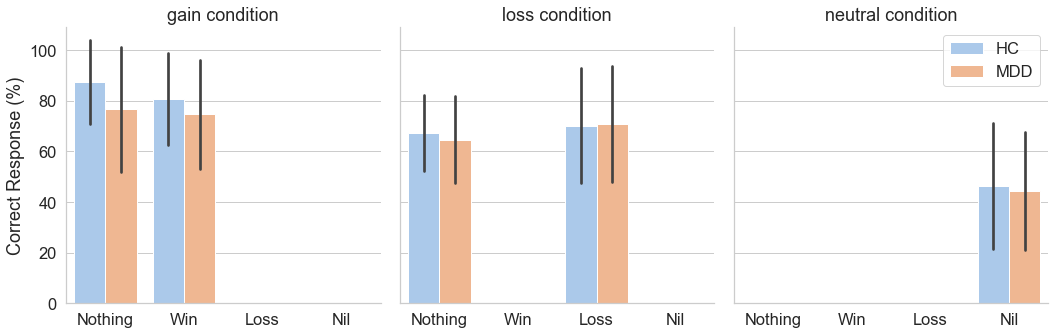

In [15]:
from matplotlib import pyplot

sns.set(font_scale=1.5) # font size 
sns.set_style("whitegrid")

choice_bar = sns.catplot(data=corr_df, palette='pastel',
            col="condition", y="corrResp_percent",
            hue='group',  x="contingency", kind='bar', ci='sd', legend=False)

# Set label for x-axis

choice_bar.set_axis_labels("", "Correct Response (%)")
choice_bar.set_xticklabels(["Nothing", "Win", "Loss", "Nil"])
choice_bar.set_titles("{col_name} {col_var}")

plt.legend(loc='best')
plt.tight_layout()

plt.savefig("../figures/choice_percent8020.png")

In [36]:
# load 80/20 choice data 
schoice=pd.read_excel('../data/80_20_corrChoice.xlsx')

schoice.columns

# rename the column 
schoice=schoice.rename(columns={'key_resp_2.corr':'corr_incorr'})
schoice

corr_df=schoice.query('corr_incorr==1')

In [37]:
corr_df

,Unnamed: 0,group,participant,condition,contingency,corr_incorr,corrResp,key_resp_2.keys,feedback,corrResp_percent
0,1,HC,501,gain,nothing,1,5,5,5,83.333333
1,3,HC,501,gain,win,1,19,19,19,79.166667
2,5,HC,501,loss,loss,1,4,4,4,66.666667
3,7,HC,501,loss,nothing,1,19,19,19,79.166667
4,9,HC,501,neutral,nil,1,10,10,10,33.333333
...,...,...,...,...,...,...,...,...,...,...
392,717,MDD,455,gain,nothing,1,6,6,6,100.000000
393,719,MDD,455,gain,win,1,23,23,23,95.833333
394,721,MDD,455,loss,loss,1,4,4,4,66.666667
395,723,MDD,455,loss,nothing,1,17,17,17,70.833333


In [23]:
# create a new column based on condition and outcome
corr_df['cond_outcome']=99

for i in range(len(corr_df)):
#     print(corr_df.condition[i])
    corr_df.cond_outcome[i]=f'{corr_df.condition[i]}-{corr_df.contingency[i]}'
corr_df

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_47514/336899829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corr_df.cond_outcome[i]=f'{corr_df.condition[i]}-{corr_df.contingency[i]}'


,Unnamed: 0,group,participant,condition,contingency,corr_incorr,corrResp,key_resp_2.keys,feedback,corrResp_percent,cond_outcome
0,1,HC,501,gain,nothing,1,5,5,5,83.333333,gain-nothing
1,3,HC,501,gain,win,1,19,19,19,79.166667,gain-win
2,5,HC,501,loss,loss,1,4,4,4,66.666667,loss-loss
3,7,HC,501,loss,nothing,1,19,19,19,79.166667,loss-nothing
4,9,HC,501,neutral,nil,1,10,10,10,33.333333,neutral-nil
...,...,...,...,...,...,...,...,...,...,...,...
268,487,MDD,444,gain,nothing,1,6,6,6,100.000000,gain-nothing
269,489,MDD,444,gain,win,1,19,19,19,79.166667,gain-win
270,490,MDD,444,loss,loss,1,6,6,6,100.000000,loss-loss
271,492,MDD,444,loss,nothing,1,21,21,21,87.500000,loss-nothing


## *TWO WAY ANOVA*

https://www.statology.org/two-way-anova-python/

H0: the means are not sig different from each other

Results:
#### Group: F = 4.60 p= 0.0328
#### Trial type: F = 32.47 p= 5.34* 10^-22
#### interaction: F = 1.37 p = .243


Interpetation: both group (MDD/HC) and trial types (gain/win, gain/loss, loss/win, loss/loss) have a statistically significant effect on the percentage of correct responses. There is not a significant interaction. 


In [311]:
model = ols('corrResp_percent ~ C(group) + C(cond_outcome) + C(group):C(cond_outcome)', data=corr_df).fit()
res=sm.stats.anova_lm(model, typ=2)
# res.to_csv('../stats/2way_8020corr.csv')
res

,sum_sq,df,F,PR(>F)
C(group),2082.887635,1.0,4.604206,3.280912e-02
C(cond_outcome),58755.852781,4.0,32.469832,5.335593e-22
C(group):C(cond_outcome),2487.818202,4.0,1.374825,2.429819e-01
Residual,118978.050595,263.0,NaN,NaN


In [314]:
# perform multiple pairwise comparison (Tukey HSD) for whole dataset

m_comp = pairwise_tukeyhsd(endog=corr_df['corrResp_percent'], groups=corr_df['cond_outcome'], alpha=0.05)
# m_comp.to_csv('../stats/tukey_8020corr.csv')

m_comp_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
# m_comp_df.to_csv('../stats/tukey_8020corr.csv')

,group1,group2,meandiff,p-adj,lower,upper,reject
0,gain-nothing,gain-win,-5.6061,0.6479,-16.8510,5.6388,False
1,gain-nothing,loss-loss,-14.5455,0.0041,-25.7904,-3.3006,True
2,gain-nothing,loss-nothing,-18.5606,0.0001,-29.8055,-7.3157,True
3,gain-nothing,neutral-nil,-42.8702,-0.0000,-54.2207,-31.5197,True
4,gain-win,loss-loss,-8.9394,0.1892,-20.1843,2.3055,False
5,gain-win,loss-nothing,-12.9545,0.0148,-24.1994,-1.7096,True
6,gain-win,neutral-nil,-37.2642,-0.0000,-48.6146,-25.9137,True
7,loss-loss,loss-nothing,-4.0152,0.8638,-15.2601,7.2297,False
8,loss-loss,neutral-nil,-28.3248,0.0000,-39.6752,-16.9743,True
9,loss-nothing,neutral-nil,-24.3096,0.0000,-35.6601,-12.9591,True


In [330]:
# subset by MDD

mdd_comp = corr_df[corr_df['group'] == 'MDD']
mdd_comp

m_comp = pairwise_tukeyhsd(endog=mdd_comp['corrResp_percent'], groups=mdd_comp['cond_outcome'], alpha=0.05)
# m_comp.to_csv('../stats/tukey_8020corr.csv')

m_comp_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
m_comp_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,gain-nothing,gain-win,-4.3155,0.9541,-21.1456,12.5146,False
1,gain-nothing,loss-loss,-7.7381,0.7091,-24.5682,9.0920,False
2,gain-nothing,loss-nothing,-14.8810,0.1099,-31.7110,1.9491,False
3,gain-nothing,neutral-nil,-35.2822,0.0000,-52.2674,-18.2970,True
4,gain-win,loss-loss,-3.4226,0.9802,-20.2527,13.4075,False
5,gain-win,loss-nothing,-10.5655,0.4156,-27.3956,6.2646,False
6,gain-win,neutral-nil,-30.9667,0.0000,-47.9519,-13.9815,True
7,loss-loss,loss-nothing,-7.1429,0.7664,-23.9729,9.6872,False
8,loss-loss,neutral-nil,-27.5441,0.0001,-44.5293,-10.5589,True
9,loss-nothing,neutral-nil,-20.4012,0.0100,-37.3864,-3.4160,True


In [334]:
## subset by trial types within groups

# subset gain-win, MDD v HC, p = 0.041

gain_win = corr_df[corr_df['cond_outcome'] == 'gain-win']
gain_win

test = pairwise_tukeyhsd(endog=gain_win['corrResp_percent'], groups=gain_win['group'], alpha=0.05)

test_df = pd.DataFrame(data=test._results_table.data[1:], columns=test._results_table.data[0])

test_df

# gain nothing, MDD v HC, p = 0.017
gain_loss = corr_df[corr_df['cond_outcome'] == 'gain-nothing']
gain_loss

test = pairwise_tukeyhsd(endog=gain_loss['corrResp_percent'], groups=gain_loss['group'], alpha=0.05)

test_df = pd.DataFrame(data=test._results_table.data[1:], columns=test._results_table.data[0])

test_df

# loss nothing p = 0.216

loss_nothing = corr_df[corr_df['cond_outcome'] == 'loss-nothing']
loss_nothing

test = pairwise_tukeyhsd(endog=loss_nothing['corrResp_percent'], groups=loss_nothing['group'], alpha=0.05)

test_df = pd.DataFrame(data=test._results_table.data[1:], columns=test._results_table.data[0])

test_df

# loss loss p = 0.938

# loss_loss = corr_df[corr_df['cond_outcome'] == 'loss-loss']
# loss_loss

# test = pairwise_tukeyhsd(endog=loss_loss['corrResp_percent'], groups=loss_loss['group'], alpha=0.05)

# test_df = pd.DataFrame(data=test._results_table.data[1:], columns=test._results_table.data[0])

# test_df


,group1,group2,meandiff,p-adj,lower,upper,reject
0,HC,MDD,-5.8642,0.2156,-15.2483,3.5199,False


## Choices

In [38]:
df_new

,corrResp,contingency,condition,key_resp_2.keys,key_resp_2.corr,feedback,participant,group
0,None,loss,loss,2,0,nothing,409,MDD
1,2,nil,neutral,None,0,nil,409,MDD
2,2,nothing,loss,None,0,loss,409,MDD
3,2,nil,neutral,None,0,nil,409,MDD
4,2,nothing,gain,2,1,nothing,409,MDD
...,...,...,...,...,...,...,...,...
7195,None,win,gain,None,1,win,549,HC
7196,2,win,gain,2,1,win,549,HC
7197,None,nil,neutral,None,1,nil,549,HC
7198,None,nil,neutral,None,1,nil,549,HC


In [39]:
df_choice=df_new.groupby(['group', 'participant','condition','key_resp_2.corr'], as_index=False).count()
df_choice

# here we can seee subject 501 during gain conditions overall made 6 wrong responses, and 24 right responses 

,group,participant,condition,key_resp_2.corr,corrResp,contingency,key_resp_2.keys,feedback
0,HC,501,gain,0,6,6,6,6
1,HC,501,gain,1,24,24,24,24
2,HC,501,loss,0,7,7,7,7
3,HC,501,loss,1,23,23,23,23
4,HC,501,neutral,0,20,20,20,20
...,...,...,...,...,...,...,...,...
459,MDD,455,gain,1,29,29,29,29
460,MDD,455,loss,0,9,9,9,9
461,MDD,455,loss,1,21,21,21,21
462,MDD,455,neutral,0,17,17,17,17


df_choice.reset_index(level=0, inplace=True)
df_choice

In [40]:
df_choice=df_choice.rename(columns={'key_resp_2.corr':'Resp_corrIncorr'})
df_choice

,group,participant,condition,Resp_corrIncorr,corrResp,contingency,key_resp_2.keys,feedback
0,HC,501,gain,0,6,6,6,6
1,HC,501,gain,1,24,24,24,24
2,HC,501,loss,0,7,7,7,7
3,HC,501,loss,1,23,23,23,23
4,HC,501,neutral,0,20,20,20,20
...,...,...,...,...,...,...,...,...
459,MDD,455,gain,1,29,29,29,29
460,MDD,455,loss,0,9,9,9,9
461,MDD,455,loss,1,21,21,21,21
462,MDD,455,neutral,0,17,17,17,17


In [41]:
# obtain only the correct choice counts
df_corr=df_choice.query('Resp_corrIncorr==1')
df_corr
df_corr.reset_index(inplace=True)
df_corr

,index,group,participant,condition,Resp_corrIncorr,corrResp,contingency,key_resp_2.keys,feedback
0,1,HC,501,gain,1,24,24,24,24
1,3,HC,501,loss,1,23,23,23,23
2,5,HC,501,neutral,1,10,10,10,10
3,7,HC,502,gain,1,15,15,15,15
4,9,HC,502,loss,1,21,21,21,21
...,...,...,...,...,...,...,...,...,...
233,455,MDD,454,loss,1,27,27,27,27
234,457,MDD,454,neutral,1,14,14,14,14
235,459,MDD,455,gain,1,29,29,29,29
236,461,MDD,455,loss,1,21,21,21,21


In [42]:
os.getcwd()

'/Users/jackiebeltran/Documents/RL/scripts'

In [44]:
# somethings wrong with the neutral indexing
for index, row in df_corr.iterrows():
    df_corr.loc[index, 'corrResp_percent'] = (row['corrResp'] / 30 ) * 100
df_corr

df_corr.to_csv('../data/corrResp_percent_N80.csv')

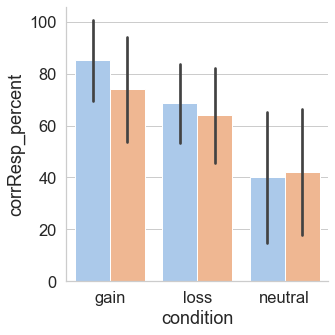

In [296]:
sns.catplot(data=df_corr, palette='pastel', y="corrResp_percent", hue='group', x="condition", kind='bar', legend=False)
plt.tight_layout()
# plt.savefig("../img/choice_corr.png")

/Users/jackiebeltran/opt/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:2805: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


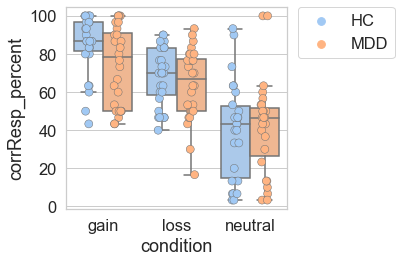

In [303]:
# sns.set(rc={'figure.figsize':(15,8)})
sns.set_style("whitegrid")
sns.stripplot(hue="group", y="corrResp_percent", x="condition",
data=df_corr, jitter=True, split=True,linewidth=0.5,palette="pastel", size=8)

# Get the ax object to use later.
ax = sns.boxplot(hue="group", y="corrResp_percent", x="condition",
data=df_corr,palette="pastel",fliersize=0)

for i,box in enumerate(ax.artists):
    box.set_edgecolor('black')
    box.set_facecolor('white')

    # iterate over whiskers and median lines
    for j in range(6*i,6*(i+1)):
         ax.lines[j].set_color('black')

# Get the handles and labels. For this example it'll be 2 tuples
# of length 4 each.
handles, labels = ax.get_legend_handles_labels()

# When creating the legend, only use the first two elements
# to effectively remove the last two.
l = plt.legend(handles[0:2], labels[0:2], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# plt.ylabel("Agency Reporting")
# plt.ylim(bottom=0,top=6)

# plt.yticks(agency_score,agency_value, rotation=45)

plt.tight_layout()
# plt.savefig("../img/choice_corrScatter.png")

*TWO WAY ANOVA*

In [300]:
model = ols('corrResp_percent ~ C(group) + C(condition) + C(group):C(condition)', data=df_corr).fit()
res=sm.stats.anova_lm(model, typ=2)
# res.to_csv('../stats/2way_corr.csv')
res

,sum_sq,df,F,PR(>F)
C(group),886.371199,1.0,2.112813,1.480666e-01
C(condition),40893.876633,2.0,48.738672,3.425048e-17
C(group):C(condition),1203.260921,2.0,1.434086,2.414376e-01
Residual,65864.932393,157.0,NaN,NaN


In [301]:


# perform multiple pairwise comparison (Tukey HSD)
m_comp = pairwise_tukeyhsd(endog=df_corr['corrResp_percent'], groups=df_corr['condition'], alpha=0.05)
# m_comp.to_csv('../stats/tukey_8020corr.csv')
m_comp_df = pd.DataFrame(data=m_comp._results_table.data[1:], columns=m_comp._results_table.data[0])
# m_comp_df.to_csv('../stats/tukey_corr.csv')

m_comp_df

,group1,group2,meandiff,p-adj,lower,upper,reject
0,gain,loss,-13.2727,0.0026,-22.5698,-3.9756,True
1,gain,neutral,-38.3854,0.0000,-47.7698,-29.0010,True
2,loss,neutral,-25.1126,0.0000,-34.4970,-15.7282,True


## Correct choices trial-by-trial

here, we take all the raw csv files and sort for each subject, by gain & loss conditions what they did trial by trial

sort by trials.thisN, participant, group, condition

In [16]:
dfs = []
for f in flist:

    df=pd.read_csv(f)


    gain=df.query('condition=="gain"')
    gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
    gain.reset_index(drop=True,inplace=True)
    gain.reset_index(level=0, inplace=True)

    loss=df.query('condition=="loss"')
    loss.sort_values(by=['trials.thisN'], inplace=True)
    loss.reset_index(drop=True,inplace=True)
    loss.reset_index(level=0, inplace=True)

    df=pd.concat([gain, loss],ignore_index=True)
    df.rename(columns={'index':'trialNum'},inplace=True) # reset index to be trial number

    dfs.append(df)
df=pd.concat(dfs,ignore_index=True)
df

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gain.sort_values(by=['trials.thisN'], inplace=True) # trialsthisN keeps count of trial number 1-90
/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/1260139442.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loss.sort_values(by=['trials.thisN'], inplace=True)


,trialNum,corrResp,stim2bottom,stim1position,contingency,stim1top,condition,trials.thisRepN,trials.thisTrialN,trials.thisN,...,choice_onset,outcome_onset,key_resp_2.rt,date,frameRate,expName,session,participant,Unnamed: 24,Unnamed: 23
0,0,2,2.png,top,nothing,1.png,gain,0,4,4,...,136.289912,136.790557,1.334407,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
1,1,None,1.png,bottom,win,2.png,gain,0,10,10,...,184.375530,184.876231,NaN,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
2,2,2,2.png,top,win,1.png,gain,0,11,11,...,192.398127,192.898829,2.118313,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
3,3,2,2.png,top,win,1.png,gain,0,12,12,...,200.437449,200.938058,NaN,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
4,4,None,1.png,bottom,win,2.png,gain,0,13,13,...,208.443339,208.944007,1.935003,2021_Jun_09_1726,59.951700,RPlearning,1,409,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4795,25,None,3.png,bottom,nothing,4.png,loss,2,18,78,...,770.993919,771.494596,NaN,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
4796,26,None,3.png,bottom,nothing,4.png,loss,2,19,79,...,778.999909,779.500532,NaN,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
4797,27,2,4.png,top,nothing,3.png,loss,2,21,81,...,795.011821,795.512478,1.134220,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN
4798,28,2,4.png,top,nothing,3.png,loss,2,22,82,...,803.017804,803.518449,0.800668,2023_Aug_25_1137,59.932231,RPlearning,1,549,NaN,NaN


In [17]:
os.getcwd()

'/Users/jackiebeltran/Documents/RL/scripts'

In [48]:
# subset for columns of interest & add group information
col_nam=['trialNum','corrResp','contingency', 'condition', 'key_resp_2.keys', 'key_resp_2.corr', 'feedback', 'participant']

df_all=df[col_nam]

# create group column 
df_all['group']=['MDD' if x<500 else 'HC' for x in df_all['participant'] ]

df_all


df_all.to_csv('../data/trial_by_trial.csv')

/var/folders/jc/p5x3b5x57nj1x3fy75x85xwr0000gn/T/ipykernel_50748/2954508760.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_all['group']=['MDD' if x<500 else 'HC' for x in df_all['participant'] ]


In [20]:
# participant N & group N
uid=df_all.participant.unique()

uid.sort()
len(uid)

mdd_n= 40
hc_n= 40

# pd.DataFrame(uid).to_csv('../data/participant_id.csv')

In [21]:
df_all

,trialNum,corrResp,contingency,condition,key_resp_2.keys,key_resp_2.corr,feedback,participant,group
0,0,2,nothing,gain,2,1,nothing,409,MDD
1,1,None,win,gain,None,1,win,409,MDD
2,2,2,win,gain,2,1,win,409,MDD
3,3,2,win,gain,None,0,nothing,409,MDD
4,4,None,win,gain,2,0,nothing,409,MDD
...,...,...,...,...,...,...,...,...,...
4795,25,None,nothing,loss,None,1,nothing,549,HC
4796,26,None,nothing,loss,None,1,nothing,549,HC
4797,27,2,nothing,loss,2,1,nothing,549,HC
4798,28,2,nothing,loss,2,1,nothing,549,HC


In [47]:
# obtain counts for how many subjects on each trial made the correct choice versus the incorrect choice
# as an example on trial 1, 13 subjects made the wrong choice, 14 made the right choice
df_trial=df_all.groupby(['group','condition','trialNum','key_resp_2.corr']).count()
df_trial 

corrResp  contingency  \
group condition trialNum key_resp_2.corr                          
HC    gain      0        0                      17           17   
                         1                      23           23   
                1        0                      16           16   
                         1                      24           24   
                2        0                      11           11   
...                                            ...          ...   
MDD   loss      27       1                      29           29   
                28       0                      15           15   
                         1                      25           25   
                29       0                      11           11   
                         1                      29           29   

                                          key_resp_2.keys  feedback  \
group condition trialNum key_resp_2.corr                              
HC    gain      0        0                             17        17   
                         1                             23        23   
                1        0                             16        16   
                         1                             24        24   
                2        0                             11        11   
...                                                   ...       ...   
MDD   loss      27       1                             29        29   
                28       0                             15        15   
                         1                             25        25   
                29       0                             11        11   
                         1                             29        29   

                                          participant  
group condition trialNum key_resp_2.corr               
HC    gain      0        0                         17  
                         1                         23  
                1        0                         16  
                         1                         24  
                2        0                         11  
...                                               ...  
MDD   loss      27       1                         29  
                28       0                         15  
                         1                         25  
                29       0                         11  
                         1                         29  

[240 rows x 5 columns]

In [24]:
df_trial.reset_index(level=0, inplace=True) 
df_trial
pd.DataFrame(df_trial).to_csv('../data/df_trial.csv')

In [25]:
# load the dataframe 
df_trial = pd.read_csv('../data/df_trial.csv')
df_trial

df_trial.columns

Index(['trialNum', 'key_resp_2.corr', 'condition', 'group', 'corrResp',
       'contingency', 'key_resp_2.keys', 'feedback', 'participant'],
      dtype='object')

In [26]:
# determine how subjects performed on a trial by trial basis by dividing by the total N for each group

for index, row in df_trial.iterrows():
    if (row['group'] == 'HC'):
        df_trial.loc[index, 'corrResp_avg'] = (row['corrResp'] / hc_n )
    elif (row['group'] == 'MDD'):
        df_trial.loc[index, 'corrResp_avg'] = (row['corrResp'] / mdd_n )
df_trial

,trialNum,key_resp_2.corr,condition,group,corrResp,contingency,key_resp_2.keys,feedback,participant,corrResp_avg
0,0,0,gain,HC,17,17,17,17,17,0.425
1,0,1,gain,HC,23,23,23,23,23,0.575
2,1,0,gain,HC,16,16,16,16,16,0.400
3,1,1,gain,HC,24,24,24,24,24,0.600
4,2,0,gain,HC,11,11,11,11,11,0.275
...,...,...,...,...,...,...,...,...,...,...
235,27,1,loss,MDD,29,29,29,29,29,0.725
236,28,0,loss,MDD,15,15,15,15,15,0.375
237,28,1,loss,MDD,25,25,25,25,25,0.625
238,29,0,loss,MDD,11,11,11,11,11,0.275


In [27]:
for index, row in df_trial.iterrows():
    if (row['group'] == 'HC'):
        df_trial.loc[index, 'corrResp_percent'] = (row['corrResp'] / hc_n ) * 100 
    elif (row['group'] == 'MDD'):
        df_trial.loc[index, 'corrResp_percent'] = (row['corrResp'] / mdd_n ) * 100
df_trial

,trialNum,key_resp_2.corr,condition,group,corrResp,contingency,key_resp_2.keys,feedback,participant,corrResp_avg,corrResp_percent
0,0,0,gain,HC,17,17,17,17,17,0.425,42.5
1,0,1,gain,HC,23,23,23,23,23,0.575,57.5
2,1,0,gain,HC,16,16,16,16,16,0.400,40.0
3,1,1,gain,HC,24,24,24,24,24,0.600,60.0
4,2,0,gain,HC,11,11,11,11,11,0.275,27.5
...,...,...,...,...,...,...,...,...,...,...,...
235,27,1,loss,MDD,29,29,29,29,29,0.725,72.5
236,28,0,loss,MDD,15,15,15,15,15,0.375,37.5
237,28,1,loss,MDD,25,25,25,25,25,0.625,62.5
238,29,0,loss,MDD,11,11,11,11,11,0.275,27.5


In [28]:
os.getcwd()

'/Users/jackiebeltran/Documents/RL/scripts'

In [29]:
# subset for correct trials only 
df_trial=df_trial.rename(columns={'key_resp_2.corr':'Resp_corrIncorr'})
df_trial_corr=df_trial.query('Resp_corrIncorr==1')
df_trial_corr.reset_index(drop=True)

df_trial_corr.to_csv('/Users/jackiebeltran/Documents/RL/scripts/data.csv')

In [32]:
data = pd.read_csv('/Users/jackiebeltran/Documents/RL/scripts/data.csv')
data

,Unnamed: 0,trial,trialNum,Resp_corrIncorr,condition,group,corrResp,contingency,key_resp_2.keys,feedback,participant,corrResp_avg,corrResp_percent
0,1,1,0,1,gain,HC,23,23,23,23,23,0.575,57.5
1,3,2,1,1,gain,HC,24,24,24,24,24,0.600,60.0
2,5,3,2,1,gain,HC,29,29,29,29,29,0.725,72.5
3,7,4,3,1,gain,HC,32,32,32,32,32,0.800,80.0
4,9,5,4,1,gain,HC,31,31,31,31,31,0.775,77.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,231,26,25,1,loss,MDD,29,29,29,29,29,0.725,72.5
116,233,27,26,1,loss,MDD,33,33,33,33,33,0.825,82.5
117,235,28,27,1,loss,MDD,29,29,29,29,29,0.725,72.5
118,237,29,28,1,loss,MDD,25,25,25,25,25,0.625,62.5


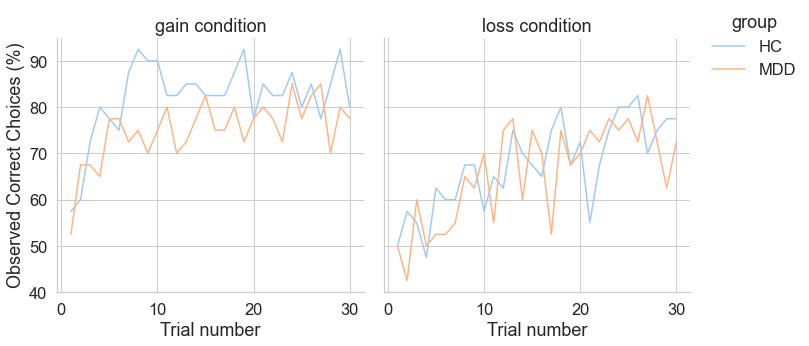

In [33]:
sns.set(font_scale=1.5) # font size 
sns.set_style("whitegrid")

obs_choices = sns.relplot(data=data, palette = 'pastel',
                         col = 'condition', y = "corrResp_percent",
                         hue = 'group', x = "trial", kind = 'line', legend=True)
    
# Set axis labels 
obs_choices.set_axis_labels("Trial number", "Observed Correct Choices (%)")
obs_choices.set_titles("{col_name} {col_var}")


# obs_choices.legend(bbox_to_anchor=(0.89, 0.5),loc='best')
# obs_choices.legend(loc='best')
sns.move_legend(obs_choices, "upper left", bbox_to_anchor=(0.88, 1))
# plt.legend(bbox_to_anchor=(1.3, 1))
# plt.tight_layout()
plt.savefig("../figures/trial_corr_legend_05_08.png")

## Go NoGo

In [ ]:
dfs = []
for f in flist:
    df=pd.read_csv(f)
    dfs.append(df)

df=pd.concat(dfs,ignore_index=True)
df

In [ ]:
df_new=df.copy()
df_new

In [ ]:
df_new['group']=['MDD' if x<500 else 'HC' for x in df_new['participant'] ]
df_new

In [ ]:
df_new["key_resp_2.keys"].replace({"None": "No go", "2":"go"}, inplace=True)
df_new.head()          

In [ ]:
df_new.rename(columns={"key_resp_2.keys":'goNoGo'}, inplace=True)

In [ ]:
df_choice=df_new.groupby(['group', 'participant','condition','goNoGo']).count()
df_choice

df_choice.reset_index(level=0, inplace=True)
df_choice

In [ ]:
df_choice

In [ ]:
df_choice['choice_percent']=110

for i in range(len(df_choice)):
    df_choice.choice_percent[i]=(df_choice.corrResp[i]/30)*100
    
df_choice

In [ ]:
go_df=df_choice.query('goNoGo=="go"')

In [ ]:
plt.figure(figsize=(50,8))

g=sns.catplot(x='condition', y="choice_percent",
             hue='group',
             data=go_df, palette='mako_r', ci='sd', kind='bar', legend=False)
g.set(ylim=(0,100))
# plt.legend(bbox_to_anchor=(1.8, 1))
g.set(xlabel='Trial number', ylabel='Percent Go Choices')
#plt.legend(loc='upper right')
plt.tight_layout()
#plt.show()
plt.savefig("../img/choice_bar.png")

In [ ]:
model = ols('choice_percent ~ C(condition) + C(group) + C(condition):C(group)', data=go_df).fit()
sm.stats.anova_lm(model, typ=2)

## RT

In [ ]:
df

In [ ]:
df.columns

In [ ]:
df['group']=['MDD' if x<500 else 'HC' for x in df['participant'] ]
df

In [ ]:
go=df.rename(columns={"key_resp_2.rt":"RT", 'group':'Group', 'participant':'Participant',"key_resp_2.keys":'goNoGo'},errors="raise")

In [ ]:
go["goNoGo"].replace({"None": "No go", "2":"go"}, inplace=True)
go.head()          

In [ ]:
go=go.query('goNoGo=="go"')
go=go.reset_index(drop=True)
go

In [ ]:
go_rt=go.groupby(['Group', 'Participant', 'condition']).describe()["RT"]
go_rt

In [ ]:
go_rt.reset_index(level=0, inplace=True)
go_rt

In [ ]:
# sns.set_context("poster")
#sns.set_style("white")
sns.catplot(x="condition", y="mean",
             hue="Group",ci='sd', palette='mako_r',
             data=go_rt, kind='bar', legend=False)

# sns.swarmplot(x='condition', 
#               y='mean', 
#               data=go_rt, 
#               color='k', hue='Group',dodge=True)
# plt.legend(bbox_to_anchor=(1.5, 1),loc='best')

# plt.savefig("../img/rt.png")

*TWO WAY ANOVA*

In [ ]:
model = ols('mean ~ C(Group) + C(condition) + C(Group):C(condition)', data=go_rt).fit()
res=sm.stats.anova_lm(model, typ=2)
res.to_csv('../stats/2way_rt.csv')
res